In [1]:
import bs4
import requests

In [2]:
# menyimpan response dari akses url
res = requests.get("https://books.toscrape.com")

In [3]:
# membuat objek soup dari response url
soup = bs4.BeautifulSoup(res.text)

## Menyimpan Elemen ke Dalam List
> Untuk setiap elemen buku memiliki pola tertentu. Dalam hal ini setiap elemen buku tersimpan pada elemen `li` dengan `class` `col-xs-6 col-sm-4 col-md-3 col-lg-3`

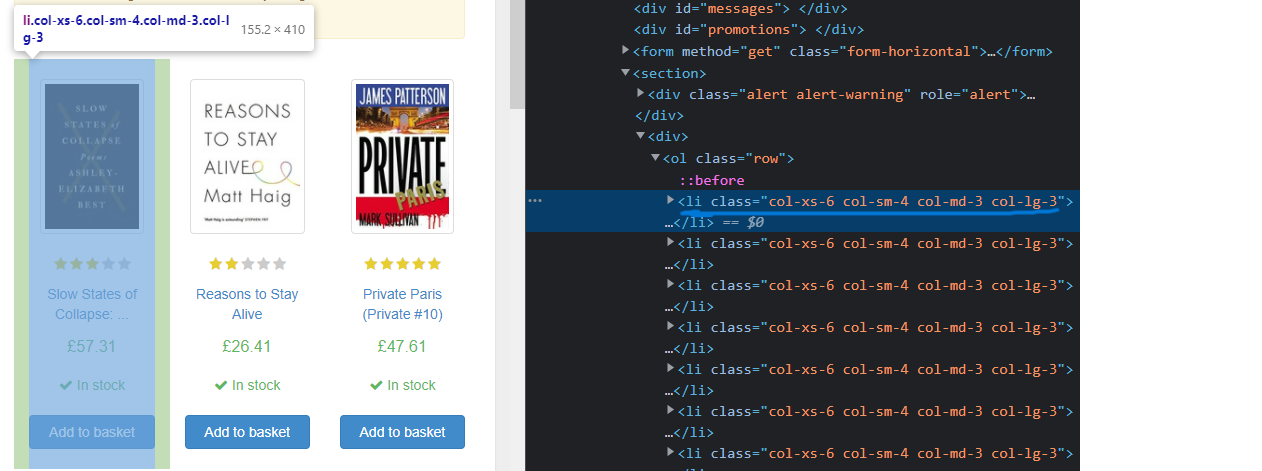

In [4]:
# menyeleksi semua elemen yang mempunyai class "col-xs-6 col-sm-4 col-md-3 col-lg-3"
# menyimpan semua elemen tersebut ke dalam variabel books_elm
books_elm = soup.find_all(class_="col-xs-6 col-sm-4 col-md-3 col-lg-3")

# alternatif: mengambil tag li dengan class "col-xs-6 col-sm-4 col-md-3 col-lg-3"
books_elm = soup.find_all('li', {'class': "col-xs-6 col-sm-4 col-md-3 col-lg-3"})

# alternatif: menggunakan css selector (membutuhkan pemahaman CSS Selector)
# books_elm = soup.select("li.col-xs-6.col-sm-4.col-md-3.col-lg-3"})

In [5]:
# Mencetak elemen buku pertama
print(books_elm[0].prettify())

<li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">
 <article class="product_pod">
  <div class="image_container">
   <a href="catalogue/a-light-in-the-attic_1000/index.html">
    <img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/>
   </a>
  </div>
  <p class="star-rating Three">
   <i class="icon-star">
   </i>
   <i class="icon-star">
   </i>
   <i class="icon-star">
   </i>
   <i class="icon-star">
   </i>
   <i class="icon-star">
   </i>
  </p>
  <h3>
   <a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">
    A Light in the ...
   </a>
  </h3>
  <div class="product_price">
   <p class="price_color">
    Â£51.77
   </p>
   <p class="instock availability">
    <i class="icon-ok">
    </i>
    In stock
   </p>
   <form>
    <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">
     Add to basket
    </button>
   </form>
  </div>
 </article>
</li>



## Mengambil Sampel Judul, Harga dan Rating dari satu Elemen Buku

### Mengambil Sampel Judul Buku

In [6]:
# Mengambil elemen dengan tag img
books_elm[0].find('img')

<img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/>

In [7]:
# Mengambil elemen dengan tag img, tetapi hanya bagian alt saja
books_elm[0].find('img')['alt']

'A Light in the Attic'

### Mengambil Sampel Harga

In [8]:
books_elm[0].find('p', {'class': 'price_color'})

<p class="price_color">Â£51.77</p>

In [9]:
books_elm[0].find('p', {'class': 'price_color'}).text

'Â£51.77'

In [10]:
str(books_elm[0].find('p', {'class': 'price_color'}).text)

'Â£51.77'

In [11]:
float(str(books_elm[0].find('p', {'class': 'price_color'}).text)[2:])

51.77

---
### Mengambil Sampel Rating (star)

In [12]:
books_elm[0].find(class_='star-rating').attrs['class'][-1]

'Three'

In [13]:
# Fungsi untuk mengubah rating dari kata menjadi integer
def str_to_int(x):
    number_in_words = {
        "One": 1,
        "Two": 2,
        "Three": 3,
        "Four": 4,
        "Five": 5
    }
    return number_in_words[x]

In [14]:
# Melakukan tes fungsi
str_to_int(books_elm[0].find(class_='star-rating').attrs['class'][-1])

3

## Menggabungkan Judul Buku, Harga dan Rating Menjadi Objek

In [15]:
objek_buku = {
    'title': books_elm[0].find('img')['alt'],
    'price': float(str(books_elm[0].find('p', {'class': 'price_color'}).text)[2:]),
    'rating': books_elm[0].find(class_='star-rating').attrs['class'][-1]
}
objek_buku

{'title': 'A Light in the Attic', 'price': 51.77, 'rating': 'Three'}

---
### Mengambil Semua Buku dalam Satu Halaman
> Kita dapat mengulang elemen books_elm untuk mengambil judul, harga, dan rating dari setiap buku menggunakan perulangan

In [16]:
# Membuat list untuk menyimpan objek - objek buku
books = []

# Memasukkan setiap objek buku ke dalam list
for book_elm in books_elm:
    objek_buku = {
        'title': book_elm.find('img')['alt'],
        'price': float(str(book_elm.find('p', {'class': 'price_color'}).text)[2:]),
        'rating': str_to_int(book_elm.find(class_='star-rating').attrs['class'][-1])
    }
    
    
    books.append(objek_buku)

In [17]:
books

[{'title': 'A Light in the Attic', 'price': 51.77, 'rating': 3},
 {'title': 'Tipping the Velvet', 'price': 53.74, 'rating': 1},
 {'title': 'Soumission', 'price': 50.1, 'rating': 1},
 {'title': 'Sharp Objects', 'price': 47.82, 'rating': 4},
 {'title': 'Sapiens: A Brief History of Humankind',
  'price': 54.23,
  'rating': 5},
 {'title': 'The Requiem Red', 'price': 22.65, 'rating': 1},
 {'title': 'The Dirty Little Secrets of Getting Your Dream Job',
  'price': 33.34,
  'rating': 4},
 {'title': 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'price': 17.93,
  'rating': 3},
 {'title': 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'price': 22.6,
  'rating': 4},
 {'title': 'The Black Maria', 'price': 52.15, 'rating': 1},
 {'title': 'Starving Hearts (Triangular Trade Trilogy, #1)',
  'price': 13.99,
  'rating': 2},
 {'title': "Shakespeare's Sonnets", 'price': 20.66, 'rating': 4},
 {'title': 'Set 

## Menyimpan Hasil Scraping ke Dalam File JSON

In [18]:
import json

In [19]:
with open("books-toscrape-page1.json", 'w') as output_file:
    json.dump({'books': books}, output_file)
    print("File berhasil di simpan!")

File berhasil di simpan!
